In [1]:
import pandas as pd
import numpy as np



In [2]:

df = pd.read_csv('Community_Crime_Statistics_20240522.csv')


In [3]:
df.head()

,Community,Category,Crime Count,Year,Month
0,01B,Assault (Non-domestic),1,2022,11
1,01B,Break & Enter - Commercial,1,2019,6
2,01B,Break & Enter - Commercial,1,2019,8
3,01B,Break & Enter - Commercial,2,2020,3
4,01B,Break & Enter - Commercial,2,2020,7


# Data Cleaning

In [6]:
df.isnull().sum()
df.dropna(inplace=True)

In [7]:
df.drop_duplicates(inplace=True)


In [8]:
# Basic statistics
df['Crime Count'].describe()


count    70661.000000
mean         2.855748
std          3.664965
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max        111.000000
Name: Crime Count, dtype: float64

In [9]:
category_crime_count = df.groupby('Category')['Crime Count'].sum().sort_values(ascending=False)
print(category_crime_count)

Category
Theft FROM Vehicle                  73434
Theft OF Vehicle                    32719
Break & Enter - Commercial          26782
Assault (Non-domestic)              25535
Violence  'Other' (Non-domestic)    13241
Break & Enter - Other Premises      12272
Break & Enter - Dwelling            11808
Street Robbery                       3859
Commercial Robbery                   2140
Name: Crime Count, dtype: int64


In [10]:
yearly_crime_count = df.groupby('Year')['Crime Count'].sum()
print(yearly_crime_count)

Year
2018    35437
2019    38298
2020    31916
2021    28572
2022    33007
2023    27931
2024     6629
Name: Crime Count, dtype: int64


In [11]:
monthly_crime_count = df.groupby('Month')['Crime Count'].sum()
print(monthly_crime_count)

Month
1     18213
2     15725
3     17824
4     17095
5     15946
6     16499
7     17865
8     18550
9     17604
10    16745
11    15234
12    14490
Name: Crime Count, dtype: int64


# Crime Count by Category (Bar Chart)

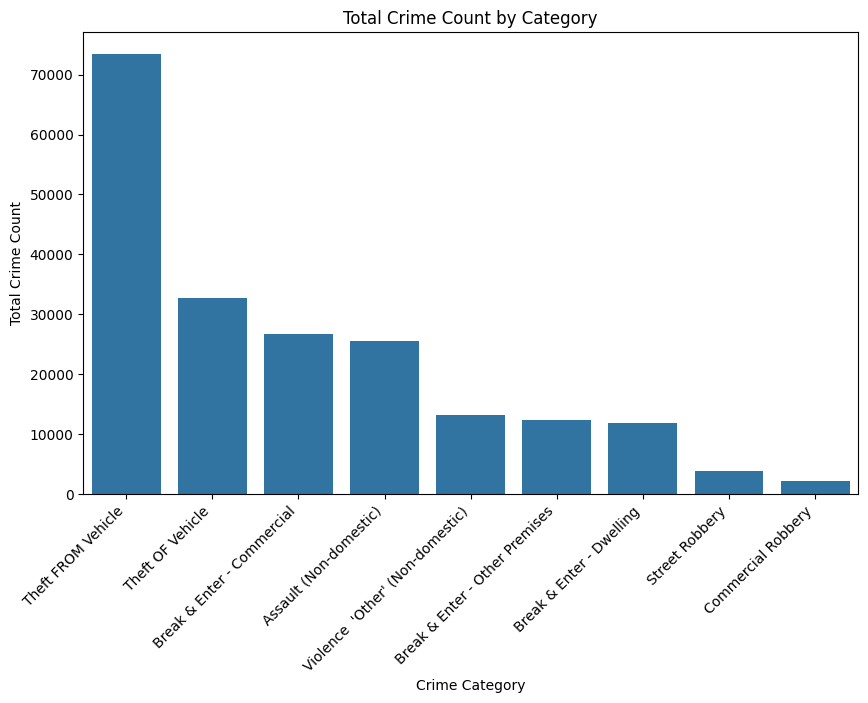

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x=category_crime_count.index, y=category_crime_count.values)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Crime Category')
plt.ylabel('Total Crime Count')
plt.title('Total Crime Count by Category')
plt.show()

# Crime Count Over Time (Line Plot):

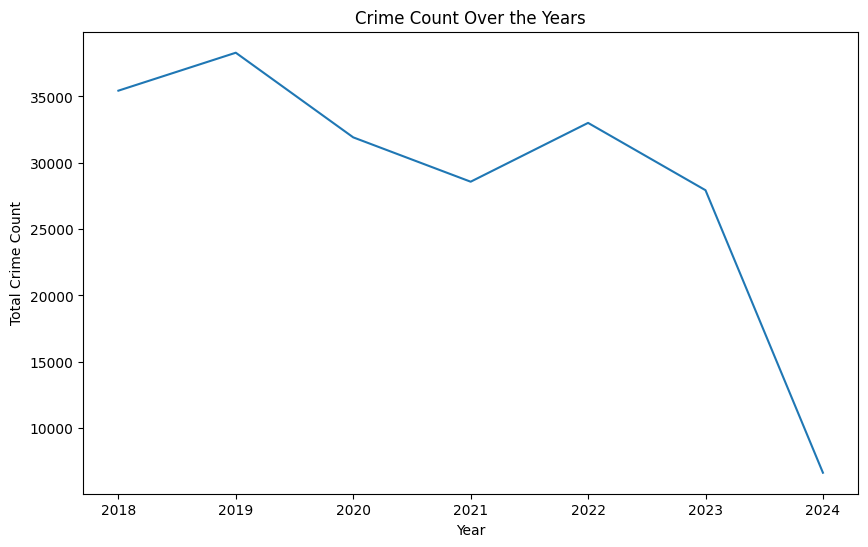

In [16]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=yearly_crime_count.index, y=yearly_crime_count.values)
plt.xlabel('Year')
plt.ylabel('Total Crime Count')
plt.title('Crime Count Over the Years')
plt.show()


# Crime Count by Month (Seasonality)

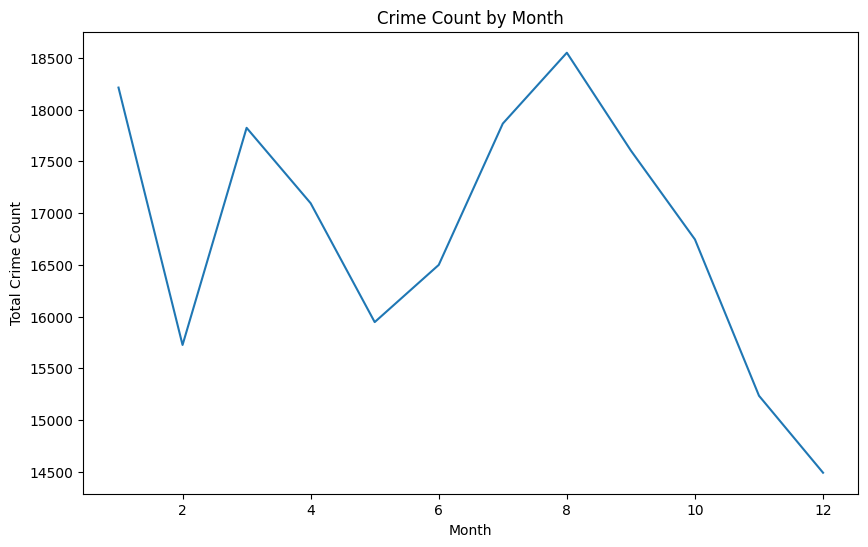

In [17]:

plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_crime_count.index, y=monthly_crime_count.values)
plt.xlabel('Month')
plt.ylabel('Total Crime Count')
plt.title('Crime Count by Month')
plt.show()


# Outlier Detection 

In [18]:
from scipy import stats


df['z_score'] = stats.zscore(df['Crime Count'])


outliers = df[df['z_score'].abs() > 3]
print(outliers)


          Community                        Category  Crime Count  Year  Month  \
1482         ACADIA  Break & Enter - Other Premises           14  2020      9   
1554         ACADIA              Theft FROM Vehicle           14  2018      4   
1557         ACADIA              Theft FROM Vehicle           20  2018      7   
1560         ACADIA              Theft FROM Vehicle           17  2018     10   
1561         ACADIA              Theft FROM Vehicle           15  2018     11   
...             ...                             ...          ...   ...    ...   
69407  WINDSOR PARK              Theft FROM Vehicle           17  2018      8   
69423  WINDSOR PARK              Theft FROM Vehicle           16  2019     12   
69424  WINDSOR PARK              Theft FROM Vehicle           22  2020      1   
69430  WINDSOR PARK              Theft FROM Vehicle           17  2020      7   
69432  WINDSOR PARK              Theft FROM Vehicle           14  2020      9   

        z_score  
1482   3.

# Crime Hotspot Analysis

In [25]:
top_10 = community_crime_count.head(10)




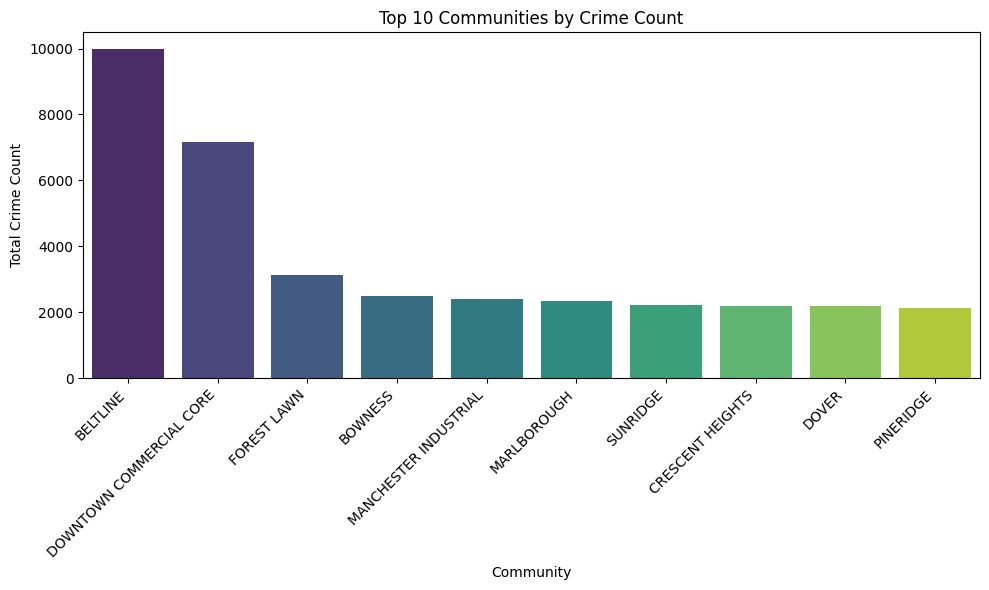

In [26]:
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10.index, y=top_10.values, hue=top_10.index, dodge=False, palette='viridis', legend=False)
plt.xticks(rotation=45, ha='right')
plt.xlabel('Community')
plt.ylabel('Total Crime Count')
plt.title('Top 10 Communities by Crime Count')
plt.tight_layout()
plt.show()

# Time Series Analysis 

In [28]:
from sklearn.linear_model import LinearRegression
import numpy as np


df_yearly = df.groupby('Year')['Crime Count'].sum().reset_index()


X = df_yearly['Year'].values.reshape(-1, 1)
y = df_yearly['Crime Count'].values


model = LinearRegression()
model.fit(X, y)


future_years = np.array([2023, 2024, 2025]).reshape(-1, 1)
predicted_crime_counts = model.predict(future_years)


for year, count in zip(future_years.flatten(), predicted_crime_counts):
    print(f"Predicted crime count for {year}: {count}")


Predicted crime count for 2023: 21250.928571428172
Predicted crime count for 2024: 17462.821428571828
Predicted crime count for 2025: 13674.714285714552
